Initial Missing Values:
 MangroveIndex    0
dtype: int64
Missing Values after Interpolation:
 MangroveIndex    0
dtype: int64


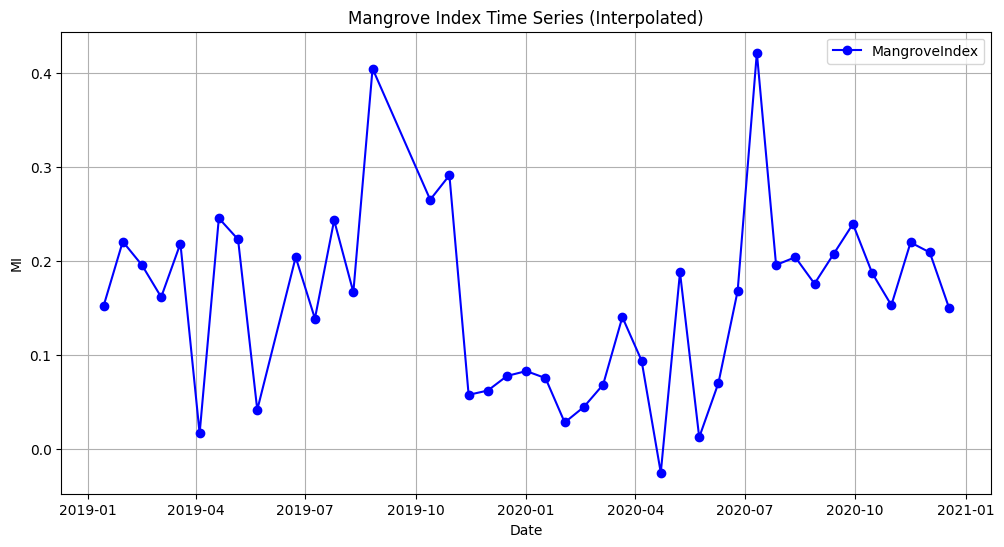

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

print("Initial Missing Values:\n", df.isnull().sum())

df['MangroveIndex'] = df['MangroveIndex'].interpolate(method='time')

print("Missing Values after Interpolation:\n", df.isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MangroveIndex'], marker='o', linestyle='-', color='b', label='MangroveIndex')
plt.title('Mangrove Index Time Series (Interpolated)')
plt.xlabel('Date')
plt.ylabel('MI')
plt.grid(True)
plt.legend()

plt.savefig('MVI_TimeSeries_Interpolated.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


Initial Missing Values:
 MangroveIndex    0
dtype: int64
Missing Values after Interpolation:
 MangroveIndex    0
dtype: int64


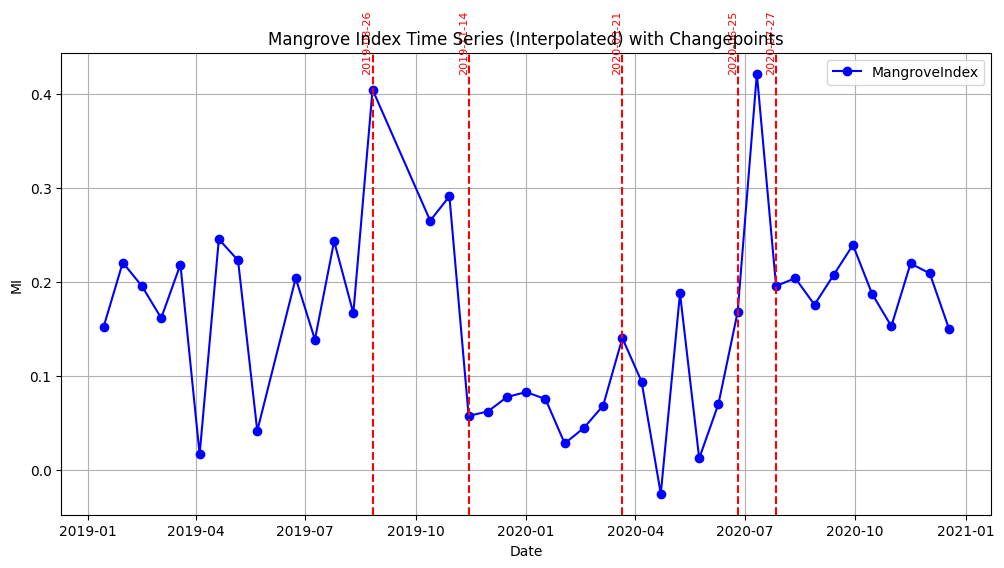

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

print("Initial Missing Values:\n", df.isnull().sum())

df['MangroveIndex'] = df['MangroveIndex'].interpolate(method='time')

print("Missing Values after Interpolation:\n", df.isnull().sum())

signal = df['MangroveIndex'].values
model = "rbf"  
algo = rpt.Binseg(model=model, jump=1).fit(signal)
n_bkps = 5 
bkps = algo.predict(n_bkps=n_bkps)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MangroveIndex'], marker='o', linestyle='-', color='b', label='MangroveIndex')
plt.title('Mangrove Index Time Series (Interpolated) with Changepoints')
plt.xlabel('Date')
plt.ylabel('MI')
plt.grid(True)
plt.legend()

for bkp in bkps[:-1]:  
    change_date = df.index[bkp]
    plt.axvline(change_date, color='r', linestyle='--', label='Changepoint')
    plt.text(change_date, df['MangroveIndex'].max(), change_date.strftime('%Y-%m-%d'), 
             rotation=90, verticalalignment='bottom', horizontalalignment='right',
             color='red', fontsize=8)

plt.savefig('MVI_TimeSeries_Interpolated_Changepoints.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


Initial Missing Values:
 MangroveIndex    0
dtype: int64
Missing Values after Interpolation:
 MangroveIndex    0
dtype: int64


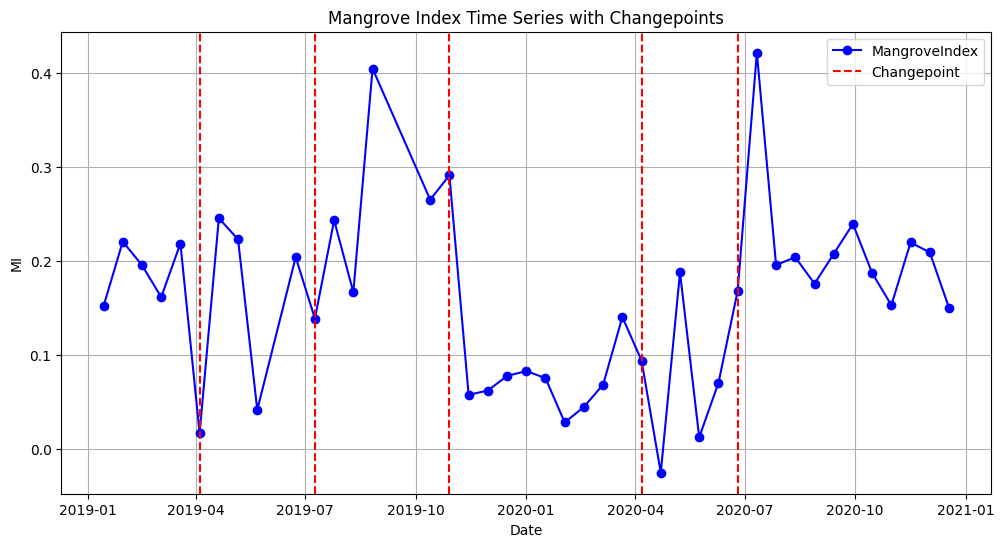

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Load the CSV file into a DataFrame
df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

# Convert the 'system:time_start' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

# Set 'system:time_start' as the index
df.set_index('system:time_start', inplace=True)

# Sort the DataFrame by date (just in case)
df.sort_index(inplace=True)

# Check for missing values
print("Initial Missing Values:\n", df.isnull().sum())

# Interpolate missing values
df['MangroveIndex'] = df['MangroveIndex'].interpolate(method='time')

# Check for remaining missing values
print("Missing Values after Interpolation:\n", df.isnull().sum())

# Extract the signal for changepoint detection
signal = df['MangroveIndex'].values

# Change point detection using Binseg with "rbf" model
model = "rbf"  # You can use different models like "l2", "rbf", "linear", etc.
algo = rpt.Binseg(model=model).fit(signal)
n_bkps = 5  # Specify the number of changepoints you want to detect
result = algo.predict(n_bkps=n_bkps)

# Plot the MVI time series with detected changepoints
fig, ax = plt.subplots(figsize=[12, 6])
ax.plot(df.index, df['MangroveIndex'], label='MangroveIndex', marker='o', linestyle='-', color='b')
ax.set_title('Mangrove Index Time Series with Changepoints')
ax.set_xlabel('Date')
ax.set_ylabel('MI')

# Highlight the changepoints
for cp in result:
    if cp < len(df):
        ax.axvline(df.index[cp], color='r', linestyle='--', label='Changepoint')

# Remove duplicate changepoint labels in the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('MI_TimeSeries_Changepoints.png', format='png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


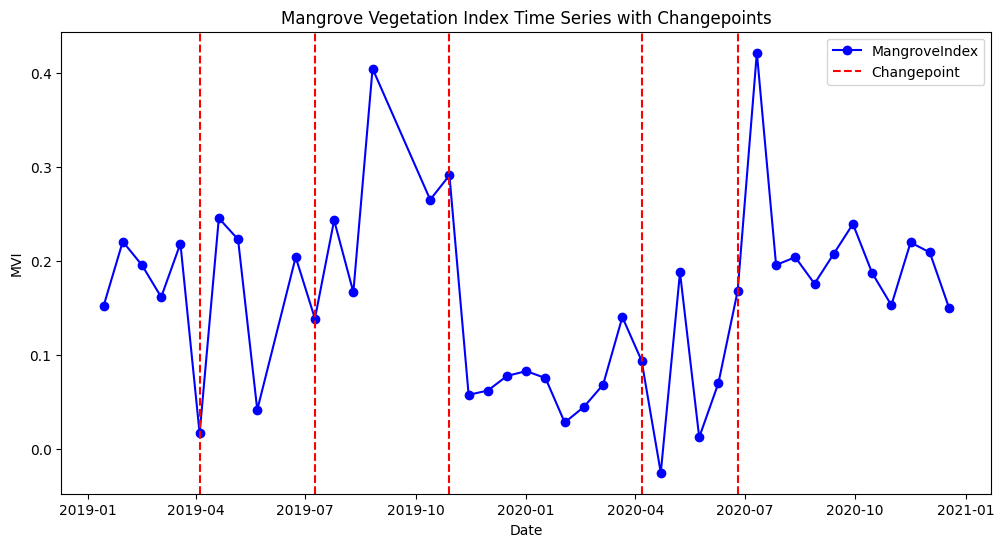

Changepoint at index 10 (Date: 2019-07-09 04:31:19.836000):
Mean before: 0.14573360023431978, Mean after: 0.24331442383264293
T-statistic: -1.453491036043323, P-value: 0.18421804090006527
----
Changepoint at index 15 (Date: 2019-10-29 04:31:47.684000):
Mean before: 0.24331442383264293, Mean after: 0.09244714034142026
T-statistic: 2.8834850960139993, P-value: 0.026917254128761416
----
Changepoint at index 25 (Date: 2020-04-06 04:31:03.472000):
Mean before: 0.09244714034142026, Mean after: 0.06741864565259345
T-statistic: 0.5720017755515522, P-value: 0.5839930741348092
----
Changepoint at index 30 (Date: 2020-06-25 04:31:08.059000):
Mean before: 0.06741864565259345, Mean after: 0.21052195697951528
T-statistic: -3.4028526266579924, P-value: 0.012198683267804046
----


IndexError: index 42 is out of bounds for axis 0 with size 42

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

df['MangroveIndex'] = df['MangroveIndex'].interpolate(method='time')

signal = df['MangroveIndex'].values

model = "rbf"
algo = rpt.Binseg(model=model).fit(signal)
n_bkps = 5
result = algo.predict(n_bkps=n_bkps)

fig, ax = plt.subplots(figsize=[12, 6])
ax.plot(df.index, df['MangroveIndex'], label='MangroveIndex', marker='o', linestyle='-', color='b')
ax.set_title('Mangrove Vegetation Index Time Series with Changepoints')
ax.set_xlabel('Date')
ax.set_ylabel('MVI')

for cp in result:
    if cp < len(df):
        ax.axvline(df.index[cp], color='r', linestyle='--', label='Changepoint')

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

plt.savefig('MVI_TimeSeries_Changepoints.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

for i in range(len(result) - 1):
    segment_before = signal[result[i]:result[i+1]]
    segment_after = signal[result[i+1]:result[i+2]] if i+2 < len(result) else signal[result[i+1]:]
    t_stat, p_val = ttest_ind(segment_before, segment_after, equal_var=False)
    print(f"Changepoint at index {result[i+1]} (Date: {df.index[result[i+1]]}):")
    print(f"Mean before: {np.mean(segment_before)}, Mean after: {np.mean(segment_after)}")
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
    print("----")

known_events = ['2020-05-15', '2020-06-10']  
for event in known_events:
    event_date = pd.to_datetime(event)
    closest_cp = min(df.index[result], key=lambda d: abs(d - event_date))
    print(f"Known event on {event} is closest to changepoint on {closest_cp}")



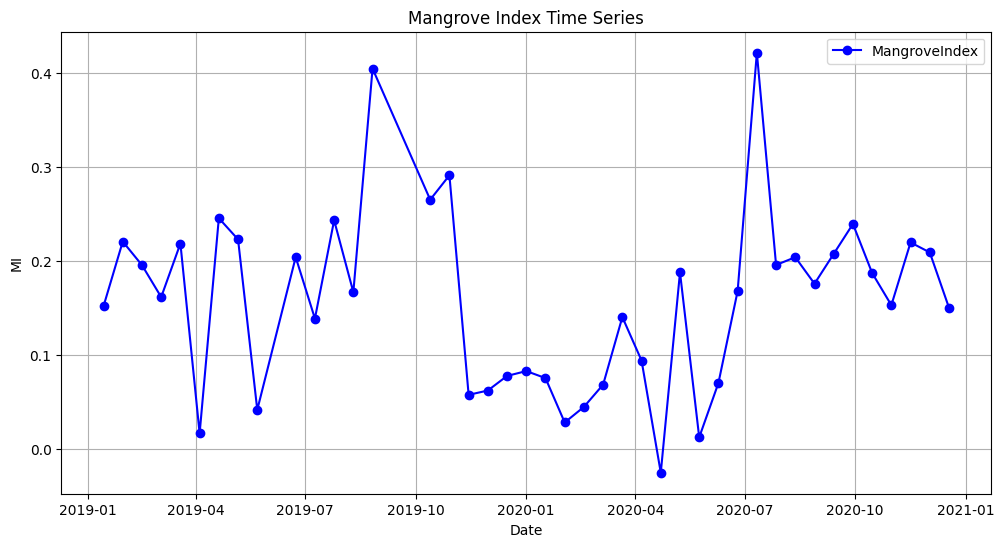

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MangroveIndex'], marker='o', linestyle='-', color='b', label='MangroveIndex')
plt.title('Mangrove Index Time Series')
plt.xlabel('Date')
plt.ylabel('MI')
plt.grid(True)
plt.legend()

plt.show()


In [10]:
df

,MangroveIndex
system:time_start,
2019-01-14 04:31:14.430,0.151565
2019-01-30 04:31:10.439,0.220239
2019-02-15 04:31:08.509,0.195136
2019-03-03 04:31:04.322,0.161171
2019-03-19 04:30:59.204,0.218149
2019-04-04 04:30:55.719,0.016176
2019-04-20 04:30:49.633,0.245106
2019-05-06 04:30:52.155,0.222527
2019-05-22 04:31:02.459,0.041220


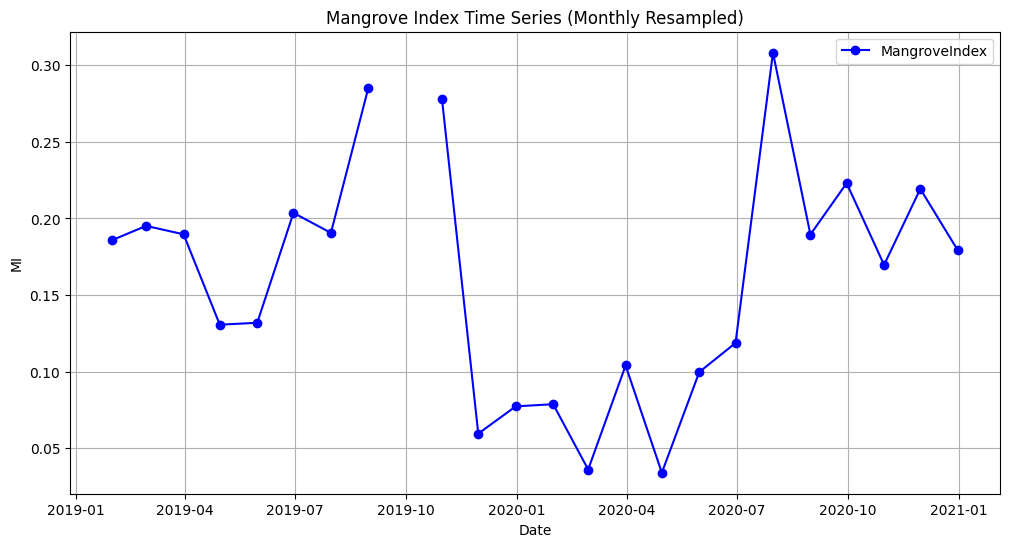

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

monthly_df = df.resample('ME').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['MangroveIndex'], marker='o', linestyle='-', color='b', label='MangroveIndex')
plt.title('Mangrove Index Time Series (Monthly Resampled)')
plt.xlabel('Date')
plt.ylabel('MI')
plt.grid(True)
plt.legend()

plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_13516\3640154575.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').mean()


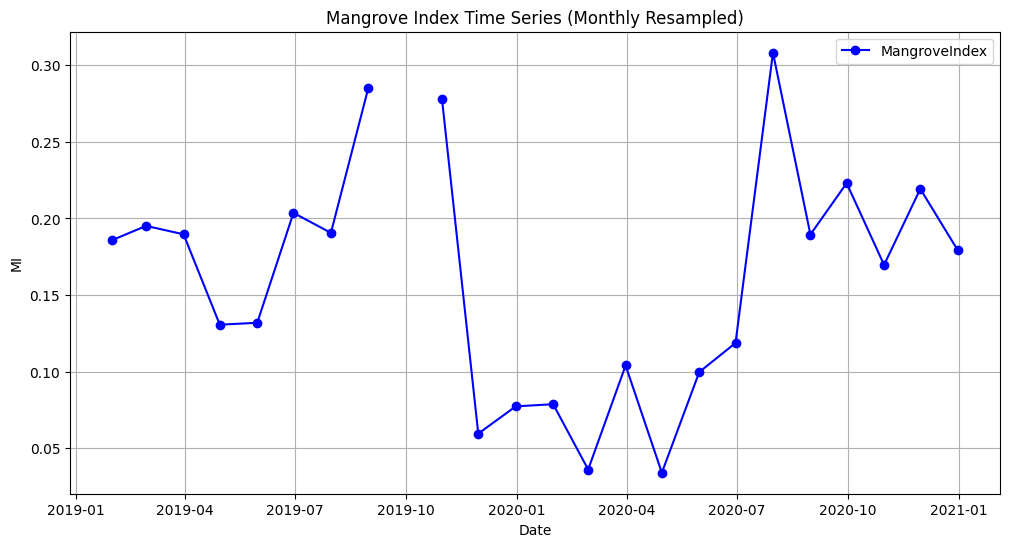

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

# Convert the 'system:time_start' column to datetime
df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

# Set 'system:time_start' as the index
df.set_index('system:time_start', inplace=True)

# Sort the DataFrame by date (just in case)
df.sort_index(inplace=True)

# Resample the data monthly and calculate the mean
monthly_df = df.resample('M').mean()

# Export the resampled DataFrame to a new CSV file
monthly_df.to_csv('MangroveIndex_TimeSeriesMonthly.csv')

# Plot the MVI time series 
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['MangroveIndex'], marker='o', linestyle='-', color='b', label='MangroveIndex')
plt.title('Mangrove Index Time Series (Monthly Resampled)')
plt.xlabel('Date')
plt.ylabel('MI')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_6900\2910880556.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M').mean()


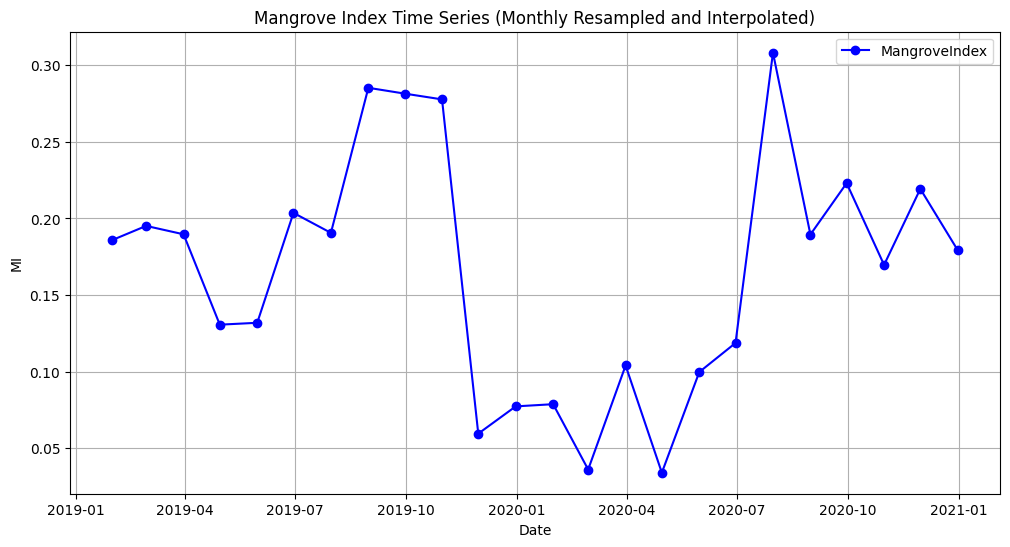

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

monthly_df = df.resample('M').mean()

monthly_df.interpolate(method='linear', inplace=True)

monthly_df.to_csv('MangroveIndex_TimeSeriesMonthly_Interpolated.csv')

plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['MangroveIndex'], marker='o', linestyle='-', color='b', label='MangroveIndex')
plt.title('Mangrove Index Time Series (Monthly Resampled and Interpolated)')
plt.xlabel('Date')
plt.ylabel('MI')
plt.grid(True)
plt.legend()

plt.show()


Initial Missing Values:
 MangroveIndex    0
dtype: int64
Missing Values after Interpolation:
 MangroveIndex    0
dtype: int64


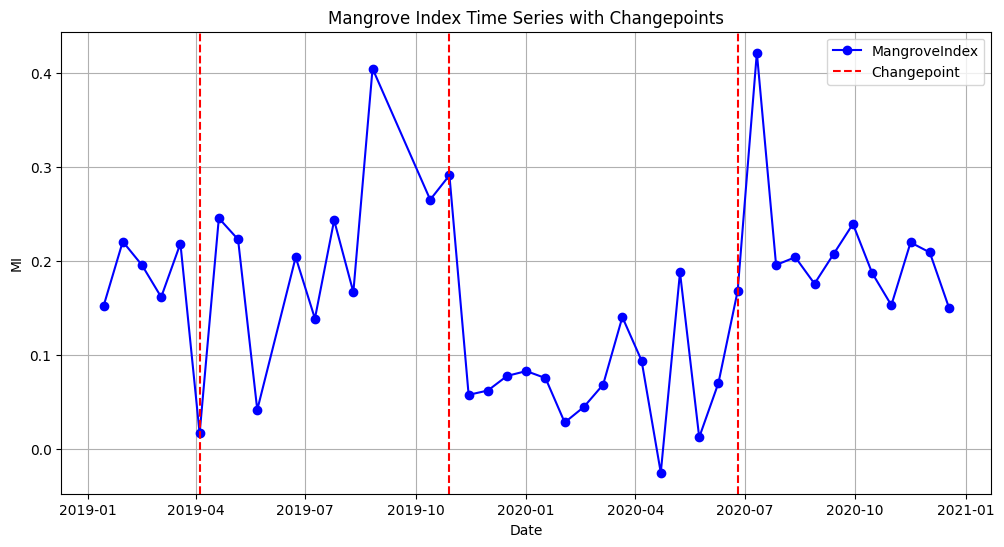

Changepoints detected at the following dates:
 DatetimeIndex(['2019-04-04 04:30:55.719000', '2019-10-29 04:31:47.684000',
               '2020-06-25 04:31:08.059000'],
              dtype='datetime64[ns]', name='system:time_start', freq=None)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

df = pd.read_csv('MangroveIndex_TimeSeriesDuringCyclone.csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'], unit='ms')

df.set_index('system:time_start', inplace=True)

df.sort_index(inplace=True)

print("Initial Missing Values:\n", df.isnull().sum())

df['MangroveIndex'] = df['MangroveIndex'].interpolate(method='time')

print("Missing Values after Interpolation:\n", df.isnull().sum())

signal = df['MangroveIndex'].values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(signal)
n_bkps = 3  
result = algo.predict(n_bkps=n_bkps)

fig, ax = plt.subplots(figsize=[12, 6])
ax.plot(df.index, df['MangroveIndex'], label='MangroveIndex', marker='o', linestyle='-', color='b')
ax.set_title('Mangrove Index Time Series with Changepoints')
ax.set_xlabel('Date')
ax.set_ylabel('MI')

for cp in result:
    if cp < len(df):
        ax.axvline(df.index[cp], color='r', linestyle='--', label='Changepoint')

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())
plt.grid(True)

plt.show()

changepoint_dates = df.index[result[:-1]]
print("Changepoints detected at the following dates:\n", changepoint_dates)
